In [44]:
import numpy as np
from tools import iterate
import matplotlib.pyplot as plt
import ipywidgets as ipy
import pandas as pd

In [30]:
def structural_population(n, leslie_matrix):
    return leslie_matrix@n

In [34]:
fecundity = [0, 0, 2, 4]
s1  = [0.5, 0, 0, 0]
s2 = [0, 1, 0, 0]
s3 = [0, 0, 0.5, 0]
L_matrix = np.array([fecundity, s1, s2, s3])
init_pop = np.array([100, 0, 0, 0])
time, pop_dynamics = iterate(structural_population, init_pop, 40, cg=L_matrix)
pop_dynamics = np.array(pop_dynamics)

/tmp/ipykernel_1077/3239019440.py:5: RuntimeWarning: divide by zero encountered in log
  axes[0].scatter(time, np.log(pop_dynamics[:, age]), label=f"population of age {age}")


[Text(0, 0.5, 'Population density (log scale)'), Text(0.5, 0, 'Time')]

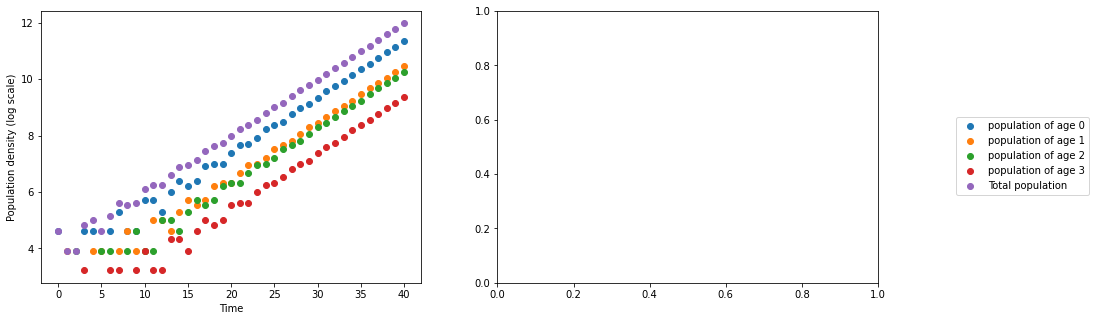

In [43]:
figure_size = (15, 5)
fig, axes = plt.subplots(1, 2, figsize=figure_size)
total_age_state = len(init_pop)
for age in range(total_age_state):
    axes[0].scatter(time, np.log(pop_dynamics[:, age]), label=f"population of age {age}")
axes[0].scatter(time, np.log(np.sum(pop_dynamics, axis=1)), 
               label="Total population")
fig.legend(bbox_to_anchor=(0.6, 0.5, 0.5, 0.1))
axes[0].set(ylabel='Population density (log scale)', xlabel='Time')

In [59]:
def interact_recursion(age_0, age_1, age_2, age_3, F3, F4, s1, s2, s3, tmax):
    init_pop = np.array([age_0, age_1, age_2, age_3])
    L_matrix = np.array([[0, 0, F3, F4], [s1, 0, 0, 0], [0, s2, 0, 0], [0, 0, s3, 0]])
    time, pop_dynamics = iterate(structural_population, init_pop, tmax, cg=L_matrix)
    col_name = ['Age 0', 'Age 1', 'Age 2', 'Age 3']
    data_frame = (pd.DataFrame(pop_dynamics[:10], columns=col_name) if 
                  len(time) > 10 else pd.DataFrame(pop_dynamics, columns=col_name))
    display(data_frame)

In [79]:
style = {'description_width':'initial'}
a0 = ipy.IntSlider(min=0, max=150, step=1, description='Init indvidual age 0', style=style)
a1 = ipy.IntSlider(min=0, max=150, step=1, description='Init individual age 1')
a2 = ipy.IntSlider(min=0, max=150, step=1, description='Initial number of individual at age 2')
a3 = ipy.IntSlider(min=0, max=150, step=1, description='Initial number of individual at age 3')
f3 = ipy.FloatSlider(min=0, max=10, step=1, description='Fecundity of individual at age 2')
f4 = ipy.FloatSlider(min=0, max=10, step=1, description='Fecundity of individual at age 3')
s1 = ipy.FloatSlider(min=0, max=1, step=1, description='Survival rate until age 1')
s2 = ipy.FloatSlider(min=0, max=1, step=1, description='Survival rate until age 2')
s3 = ipy.FloatSlider(min=0, max=1, step=1, description='Survival rate until age 3')
tmax = ipy.FloatSlider(min=2, max=100, step=1, description='Maximum iteration time')
widget_box = ipy.HBox([a0, a1, a2, a3, f3, f4], layout = ipy.Layout(flex_flow='column', width='1520', height='120'))
widget = ipy.interactive_output(interact_recursion, 
                                {'age_0':a0, 'age_1': a1, 'age_2': a2, 'age_3': a3,
                                 'F3':f3, 'F4': f4, 's1':s1, 's2':s2, 's3':s3,'tmax':tmax})
display(widget_box, widget)

Output()

In [ ]:
def plotinteract_leslise(F1, F2, F3, F4, s1, s2, s3):
    L_matrix = np.array([F1, F2, F3, F4], [s1, 0, 0, 0], [0, s2, 0, 0],[0, 0, s3, 0])
    